In [338]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [339]:
#X_train = pd.read_csv('UCI HAR Dataset\\train\\X_train.txt', sep='\t')

In [340]:
data_list = []
with open('UCI HAR Dataset\\train\\X_train.txt', 'r') as data:
    for line in data:
        data_list.append(line.split())


In [341]:
X_train = pd.DataFrame(data_list)

In [342]:
labels = open('UCI HAR Dataset\\train\\y_train.txt', 'r').read().split()

In [343]:
pd.DataFrame(labels).value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
dtype: int64

In [344]:
stats = []
cluster_range = range(2, 16)
for i in cluster_range:
    kmeans = KMeans(n_clusters=i, random_state=99)
    kmeans.fit(X_train)
    stats.append(kmeans.inertia_)

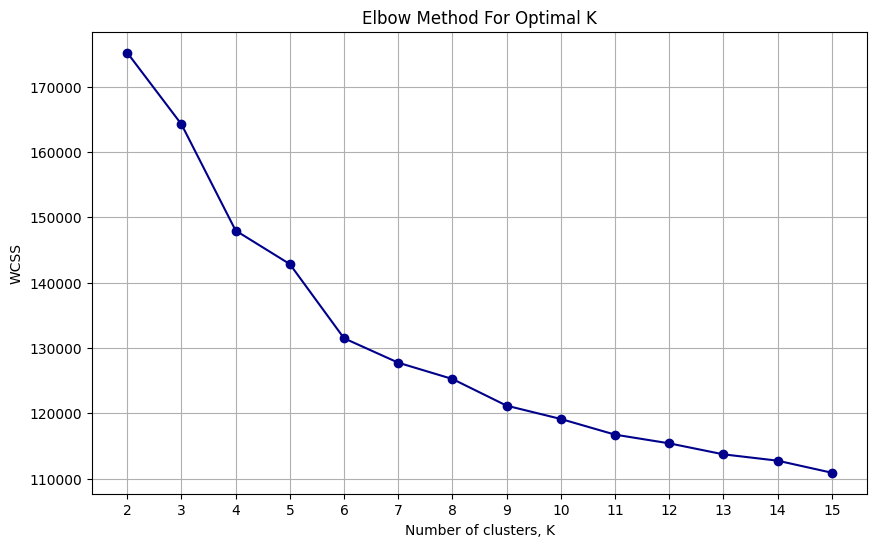

In [345]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, stats, '-o', color='darkblue')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters, K')
plt.ylabel('WCSS')
plt.xticks(cluster_range)
plt.grid(True)
plt.savefig('kmeans_elbow.png')
plt.show()

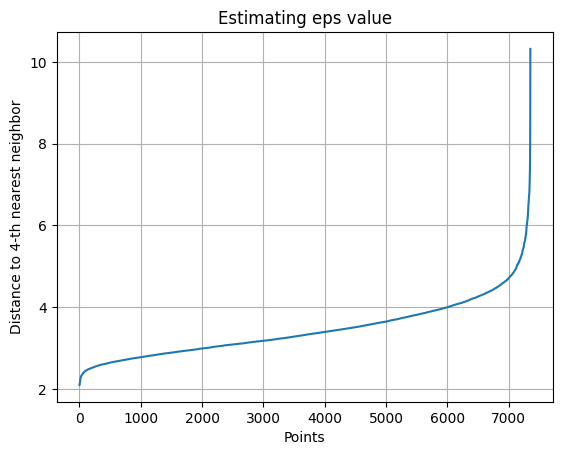

In [336]:
min_samples = 4

nearest_neighbors = NearestNeighbors(n_neighbors=min_samples)
nearest_neighbors.fit(X_train)
distances, indices = nearest_neighbors.kneighbors(X_train)

# Sort distances
sorted_distances = np.sort(distances[:, min_samples-1], axis=0)

plt.plot(sorted_distances)
plt.xlabel('Points')
plt.ylabel(f'Distance to {min_samples}-th nearest neighbor')
plt.title('Estimating eps value')
plt.grid(True)
plt.savefig('estimate_eps.png')
plt.show()

In [283]:
def search_dbscan(eps_range, min_sample_range, data):

    stats_dbscan = []

    for i in eps_range:
        for j in min_sample_range:

            print('Params: eps:' + str(i/10) + ' min_sample:' + str(j))

            dbscan = DBSCAN(eps=i/10, min_samples=j)
            dbscan.fit(data)

            dbscan_labels = dbscan.labels_
            n_clusters_ = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
            n_noise_ = list(dbscan_labels).count(-1)

            arc = adjusted_rand_score(labels, dbscan_labels)

            stats_dbscan.append((i/10, j, n_clusters_, n_noise_, arc))
            
    x = pd.DataFrame(stats_dbscan)
    x.columns = ['eps', 'min_samples', 'n_clusters', 'n_noise', 'arc']
    return x.sort_values('arc', ascending=False)

In [271]:
results = search_dbscan(range(40, 60, 5), range(3, 16, 1), X_train)
print(results.head(10))

    eps  min_samples  n_clusters  n_noise       arc
19  4.5            9           3      489  0.324894
20  4.5           10           3      499  0.324852
18  4.5            8           4      463  0.324659
22  4.5           12           3      538  0.324479
21  4.5           11           3      523  0.324464
23  4.5           13           4      555  0.324134
24  4.5           14           3      579  0.323727
25  4.5           15           3      599  0.323440
8   4.0           11          10     1486  0.313544
6   4.0            9          16     1379  0.312432


In [289]:
dbscan = DBSCAN(eps=4.5, min_samples=9)
dbscan.fit(X_train)
dbscan_labels = dbscan.labels_
print(pd.DataFrame(dbscan_labels).value_counts())

 0    3853
 1    2977
-1     489
 2      33
dtype: int64


In [290]:
db_results = pd.DataFrame()
eps_range = range(35, 60, 1)
min_samples_range = range(3, 30, 2)

for p in [250, 150, 100, 75, 50, 30, 15, 9, 5]:
    print('p = ' + str(p) + ' starting')
    pca = PCA(n_components=p)
    X_pca = pca.fit_transform(X_train)
    results = search_dbscan(eps_range, min_samples_range, X_pca)
    results['pca'] = p
    db_results = db_results.append(results)

p = 250 starting
Params: eps:3.5 min_sample:3
Params: eps:3.5 min_sample:5
Params: eps:3.5 min_sample:7
Params: eps:3.5 min_sample:9
Params: eps:3.5 min_sample:11
Params: eps:3.5 min_sample:13
Params: eps:3.5 min_sample:15
Params: eps:3.5 min_sample:17
Params: eps:3.5 min_sample:19
Params: eps:3.5 min_sample:21
Params: eps:3.5 min_sample:23
Params: eps:3.5 min_sample:25
Params: eps:3.5 min_sample:27
Params: eps:3.5 min_sample:29
Params: eps:3.6 min_sample:3
Params: eps:3.6 min_sample:5
Params: eps:3.6 min_sample:7
Params: eps:3.6 min_sample:9
Params: eps:3.6 min_sample:11
Params: eps:3.6 min_sample:13
Params: eps:3.6 min_sample:15
Params: eps:3.6 min_sample:17
Params: eps:3.6 min_sample:19
Params: eps:3.6 min_sample:21
Params: eps:3.6 min_sample:23
Params: eps:3.6 min_sample:25
Params: eps:3.6 min_sample:27
Params: eps:3.6 min_sample:29
Params: eps:3.7 min_sample:3
Params: eps:3.7 min_sample:5
Params: eps:3.7 min_sample:7
Params: eps:3.7 min_sample:9
Params: eps:3.7 min_sample:11
Param

C:\Users\fredd\AppData\Local\Temp\ipykernel_10692\3415111006.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  db_results = db_results.append(results)


p = 150 starting
Params: eps:3.5 min_sample:3
Params: eps:3.5 min_sample:5
Params: eps:3.5 min_sample:7
Params: eps:3.5 min_sample:9
Params: eps:3.5 min_sample:11
Params: eps:3.5 min_sample:13
Params: eps:3.5 min_sample:15
Params: eps:3.5 min_sample:17
Params: eps:3.5 min_sample:19
Params: eps:3.5 min_sample:21
Params: eps:3.5 min_sample:23
Params: eps:3.5 min_sample:25
Params: eps:3.5 min_sample:27
Params: eps:3.5 min_sample:29
Params: eps:3.6 min_sample:3
Params: eps:3.6 min_sample:5
Params: eps:3.6 min_sample:7
Params: eps:3.6 min_sample:9
Params: eps:3.6 min_sample:11
Params: eps:3.6 min_sample:13
Params: eps:3.6 min_sample:15
Params: eps:3.6 min_sample:17
Params: eps:3.6 min_sample:19
Params: eps:3.6 min_sample:21
Params: eps:3.6 min_sample:23
Params: eps:3.6 min_sample:25
Params: eps:3.6 min_sample:27
Params: eps:3.6 min_sample:29
Params: eps:3.7 min_sample:3
Params: eps:3.7 min_sample:5
Params: eps:3.7 min_sample:7
Params: eps:3.7 min_sample:9
Params: eps:3.7 min_sample:11
Param

C:\Users\fredd\AppData\Local\Temp\ipykernel_10692\3415111006.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  db_results = db_results.append(results)


p = 100 starting
Params: eps:3.5 min_sample:3
Params: eps:3.5 min_sample:5
Params: eps:3.5 min_sample:7
Params: eps:3.5 min_sample:9
Params: eps:3.5 min_sample:11
Params: eps:3.5 min_sample:13
Params: eps:3.5 min_sample:15
Params: eps:3.5 min_sample:17
Params: eps:3.5 min_sample:19
Params: eps:3.5 min_sample:21
Params: eps:3.5 min_sample:23
Params: eps:3.5 min_sample:25
Params: eps:3.5 min_sample:27
Params: eps:3.5 min_sample:29
Params: eps:3.6 min_sample:3
Params: eps:3.6 min_sample:5
Params: eps:3.6 min_sample:7
Params: eps:3.6 min_sample:9
Params: eps:3.6 min_sample:11
Params: eps:3.6 min_sample:13
Params: eps:3.6 min_sample:15
Params: eps:3.6 min_sample:17
Params: eps:3.6 min_sample:19
Params: eps:3.6 min_sample:21
Params: eps:3.6 min_sample:23
Params: eps:3.6 min_sample:25
Params: eps:3.6 min_sample:27
Params: eps:3.6 min_sample:29
Params: eps:3.7 min_sample:3
Params: eps:3.7 min_sample:5
Params: eps:3.7 min_sample:7
Params: eps:3.7 min_sample:9
Params: eps:3.7 min_sample:11
Param

C:\Users\fredd\AppData\Local\Temp\ipykernel_10692\3415111006.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  db_results = db_results.append(results)


p = 75 starting
Params: eps:3.5 min_sample:3
Params: eps:3.5 min_sample:5
Params: eps:3.5 min_sample:7
Params: eps:3.5 min_sample:9
Params: eps:3.5 min_sample:11
Params: eps:3.5 min_sample:13
Params: eps:3.5 min_sample:15
Params: eps:3.5 min_sample:17
Params: eps:3.5 min_sample:19
Params: eps:3.5 min_sample:21
Params: eps:3.5 min_sample:23
Params: eps:3.5 min_sample:25
Params: eps:3.5 min_sample:27
Params: eps:3.5 min_sample:29
Params: eps:3.6 min_sample:3
Params: eps:3.6 min_sample:5
Params: eps:3.6 min_sample:7
Params: eps:3.6 min_sample:9
Params: eps:3.6 min_sample:11
Params: eps:3.6 min_sample:13
Params: eps:3.6 min_sample:15
Params: eps:3.6 min_sample:17
Params: eps:3.6 min_sample:19
Params: eps:3.6 min_sample:21
Params: eps:3.6 min_sample:23
Params: eps:3.6 min_sample:25
Params: eps:3.6 min_sample:27
Params: eps:3.6 min_sample:29
Params: eps:3.7 min_sample:3
Params: eps:3.7 min_sample:5
Params: eps:3.7 min_sample:7
Params: eps:3.7 min_sample:9
Params: eps:3.7 min_sample:11
Params

C:\Users\fredd\AppData\Local\Temp\ipykernel_10692\3415111006.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  db_results = db_results.append(results)


p = 50 starting
Params: eps:3.5 min_sample:3
Params: eps:3.5 min_sample:5
Params: eps:3.5 min_sample:7
Params: eps:3.5 min_sample:9
Params: eps:3.5 min_sample:11
Params: eps:3.5 min_sample:13
Params: eps:3.5 min_sample:15
Params: eps:3.5 min_sample:17
Params: eps:3.5 min_sample:19
Params: eps:3.5 min_sample:21
Params: eps:3.5 min_sample:23
Params: eps:3.5 min_sample:25
Params: eps:3.5 min_sample:27
Params: eps:3.5 min_sample:29
Params: eps:3.6 min_sample:3
Params: eps:3.6 min_sample:5
Params: eps:3.6 min_sample:7
Params: eps:3.6 min_sample:9
Params: eps:3.6 min_sample:11
Params: eps:3.6 min_sample:13
Params: eps:3.6 min_sample:15
Params: eps:3.6 min_sample:17
Params: eps:3.6 min_sample:19
Params: eps:3.6 min_sample:21
Params: eps:3.6 min_sample:23
Params: eps:3.6 min_sample:25
Params: eps:3.6 min_sample:27
Params: eps:3.6 min_sample:29
Params: eps:3.7 min_sample:3
Params: eps:3.7 min_sample:5
Params: eps:3.7 min_sample:7
Params: eps:3.7 min_sample:9
Params: eps:3.7 min_sample:11
Params

C:\Users\fredd\AppData\Local\Temp\ipykernel_10692\3415111006.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  db_results = db_results.append(results)


p = 30 starting
Params: eps:3.5 min_sample:3
Params: eps:3.5 min_sample:5
Params: eps:3.5 min_sample:7
Params: eps:3.5 min_sample:9
Params: eps:3.5 min_sample:11
Params: eps:3.5 min_sample:13
Params: eps:3.5 min_sample:15
Params: eps:3.5 min_sample:17
Params: eps:3.5 min_sample:19
Params: eps:3.5 min_sample:21
Params: eps:3.5 min_sample:23
Params: eps:3.5 min_sample:25
Params: eps:3.5 min_sample:27
Params: eps:3.5 min_sample:29
Params: eps:3.6 min_sample:3
Params: eps:3.6 min_sample:5
Params: eps:3.6 min_sample:7
Params: eps:3.6 min_sample:9
Params: eps:3.6 min_sample:11
Params: eps:3.6 min_sample:13
Params: eps:3.6 min_sample:15
Params: eps:3.6 min_sample:17
Params: eps:3.6 min_sample:19
Params: eps:3.6 min_sample:21
Params: eps:3.6 min_sample:23
Params: eps:3.6 min_sample:25
Params: eps:3.6 min_sample:27
Params: eps:3.6 min_sample:29
Params: eps:3.7 min_sample:3
Params: eps:3.7 min_sample:5
Params: eps:3.7 min_sample:7
Params: eps:3.7 min_sample:9
Params: eps:3.7 min_sample:11
Params

C:\Users\fredd\AppData\Local\Temp\ipykernel_10692\3415111006.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  db_results = db_results.append(results)


p = 15 starting
Params: eps:3.5 min_sample:3
Params: eps:3.5 min_sample:5
Params: eps:3.5 min_sample:7
Params: eps:3.5 min_sample:9
Params: eps:3.5 min_sample:11
Params: eps:3.5 min_sample:13
Params: eps:3.5 min_sample:15
Params: eps:3.5 min_sample:17
Params: eps:3.5 min_sample:19
Params: eps:3.5 min_sample:21
Params: eps:3.5 min_sample:23
Params: eps:3.5 min_sample:25
Params: eps:3.5 min_sample:27
Params: eps:3.5 min_sample:29
Params: eps:3.6 min_sample:3
Params: eps:3.6 min_sample:5
Params: eps:3.6 min_sample:7
Params: eps:3.6 min_sample:9
Params: eps:3.6 min_sample:11
Params: eps:3.6 min_sample:13
Params: eps:3.6 min_sample:15
Params: eps:3.6 min_sample:17
Params: eps:3.6 min_sample:19
Params: eps:3.6 min_sample:21
Params: eps:3.6 min_sample:23
Params: eps:3.6 min_sample:25
Params: eps:3.6 min_sample:27
Params: eps:3.6 min_sample:29
Params: eps:3.7 min_sample:3
Params: eps:3.7 min_sample:5
Params: eps:3.7 min_sample:7
Params: eps:3.7 min_sample:9
Params: eps:3.7 min_sample:11
Params

C:\Users\fredd\AppData\Local\Temp\ipykernel_10692\3415111006.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  db_results = db_results.append(results)


p = 9 starting
Params: eps:3.5 min_sample:3
Params: eps:3.5 min_sample:5
Params: eps:3.5 min_sample:7
Params: eps:3.5 min_sample:9
Params: eps:3.5 min_sample:11
Params: eps:3.5 min_sample:13
Params: eps:3.5 min_sample:15
Params: eps:3.5 min_sample:17
Params: eps:3.5 min_sample:19
Params: eps:3.5 min_sample:21
Params: eps:3.5 min_sample:23
Params: eps:3.5 min_sample:25
Params: eps:3.5 min_sample:27
Params: eps:3.5 min_sample:29
Params: eps:3.6 min_sample:3
Params: eps:3.6 min_sample:5
Params: eps:3.6 min_sample:7
Params: eps:3.6 min_sample:9
Params: eps:3.6 min_sample:11
Params: eps:3.6 min_sample:13
Params: eps:3.6 min_sample:15
Params: eps:3.6 min_sample:17
Params: eps:3.6 min_sample:19
Params: eps:3.6 min_sample:21
Params: eps:3.6 min_sample:23
Params: eps:3.6 min_sample:25
Params: eps:3.6 min_sample:27
Params: eps:3.6 min_sample:29
Params: eps:3.7 min_sample:3
Params: eps:3.7 min_sample:5
Params: eps:3.7 min_sample:7
Params: eps:3.7 min_sample:9
Params: eps:3.7 min_sample:11
Params:

C:\Users\fredd\AppData\Local\Temp\ipykernel_10692\3415111006.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  db_results = db_results.append(results)


p = 5 starting
Params: eps:3.5 min_sample:3
Params: eps:3.5 min_sample:5
Params: eps:3.5 min_sample:7
Params: eps:3.5 min_sample:9
Params: eps:3.5 min_sample:11
Params: eps:3.5 min_sample:13
Params: eps:3.5 min_sample:15
Params: eps:3.5 min_sample:17
Params: eps:3.5 min_sample:19
Params: eps:3.5 min_sample:21
Params: eps:3.5 min_sample:23
Params: eps:3.5 min_sample:25
Params: eps:3.5 min_sample:27
Params: eps:3.5 min_sample:29
Params: eps:3.6 min_sample:3
Params: eps:3.6 min_sample:5
Params: eps:3.6 min_sample:7
Params: eps:3.6 min_sample:9
Params: eps:3.6 min_sample:11
Params: eps:3.6 min_sample:13
Params: eps:3.6 min_sample:15
Params: eps:3.6 min_sample:17
Params: eps:3.6 min_sample:19
Params: eps:3.6 min_sample:21
Params: eps:3.6 min_sample:23
Params: eps:3.6 min_sample:25
Params: eps:3.6 min_sample:27
Params: eps:3.6 min_sample:29
Params: eps:3.7 min_sample:3
Params: eps:3.7 min_sample:5
Params: eps:3.7 min_sample:7
Params: eps:3.7 min_sample:9
Params: eps:3.7 min_sample:11
Params:

C:\Users\fredd\AppData\Local\Temp\ipykernel_10692\3415111006.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  db_results = db_results.append(results)


In [292]:
db_results.sort_values('arc', ascending=False).head(10)

,eps,min_samples,n_clusters,n_noise,arc,pca
27,3.6,29,2,167,0.329540,30
10,3.5,23,2,176,0.329437,30
11,3.5,25,2,187,0.329092,30
56,3.9,3,4,60,0.329012,50
42,3.8,3,5,69,0.328887,50
12,3.5,27,2,196,0.328827,30
13,3.5,29,2,199,0.328786,30
57,3.9,5,4,85,0.328549,50
78,4.0,19,2,175,0.328446,50
58,3.9,7,3,110,0.328368,50


In [294]:
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X_train)
dbscan = DBSCAN(eps=3.6, min_samples=29)
dbscan.fit(X_pca)
dbscan_labels = dbscan.labels_
print(pd.DataFrame(dbscan_labels).value_counts())

 0    4008
 1    3175
-1     169
dtype: int64


In [303]:
km_results = pd.DataFrame()
stats = []

for p in [250, 150, 100, 75, 50, 30, 15, 9, 5]:
    cluster_range = range(2, 16)
    pca = PCA(n_components=p)
    X_pca = pca.fit_transform(X_train)
    for i in cluster_range:
        kmeans = KMeans(n_clusters=i, random_state=99)
        kmeans.fit(X_pca)
        stats.append([kmeans.inertia_, i, p])

In [304]:
stats_df = pd.DataFrame(stats)
stats_df.columns = ['inertia', 'n_clusters', 'pca']

In [348]:
stats_df[stats_df['pca']==250]['inertia']

0     174406.781450
1     163451.987056
2     147184.113476
3     142055.644785
4     130698.434701
5     126960.834989
6     123686.423920
7     120746.746645
8     118717.453219
9     117332.247650
10    115103.202358
11    112876.492328
12    111421.038312
13    110502.788463
Name: inertia, dtype: float64

In [351]:
colors = {
  250: '#000080',
  150: '#0000ff',
  100: '#0080ff',
  75: '#16ffe1',
  50: '#7dff7a',
  30: '#e4ff13',
  15: '#ff9400',
  9: '#ff1e00',
  5: '#800000'
}

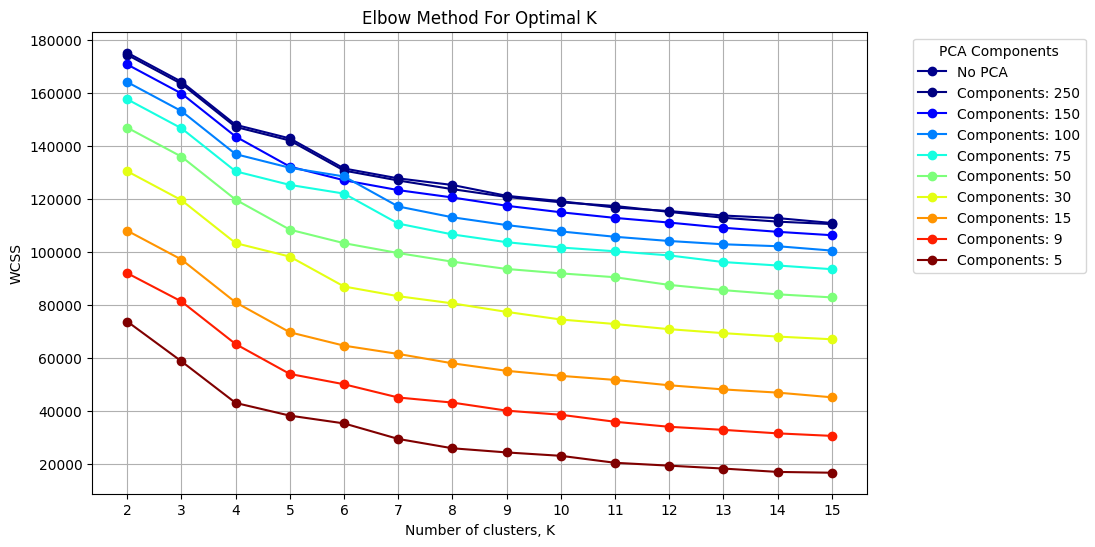

In [361]:
plt.figure(figsize=(10, 6))
#plt.plot(cluster_range, stats, '-o', color='darkblue')

plt.plot(cluster_range, stats, '-o', color='darkblue', label=f'No PCA')

for p in [250, 150, 100, 75, 50, 30, 15, 9, 5]:
    plt.plot(cluster_range, stats_df[stats_df['pca']==p]['inertia'], '-o', color=colors[p], label=f'Components: {p}')

plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters, K')
plt.ylabel('WCSS')
plt.xticks(cluster_range)
plt.grid(True)
plt.legend(title="PCA Components", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('kmeans_elbow.png')
plt.show()

In [357]:
pca = PCA(n_components=250)
X_pca = pca.fit_transform(X_train)
kmeans = KMeans(n_clusters=6, random_state=99)
kmeans.fit(X_pca)
labels_250_6 = kmeans.labels_

In [331]:
pca_display = PCA(n_components=2)
X_pca_diaplay = pca.fit_transform(X_train)

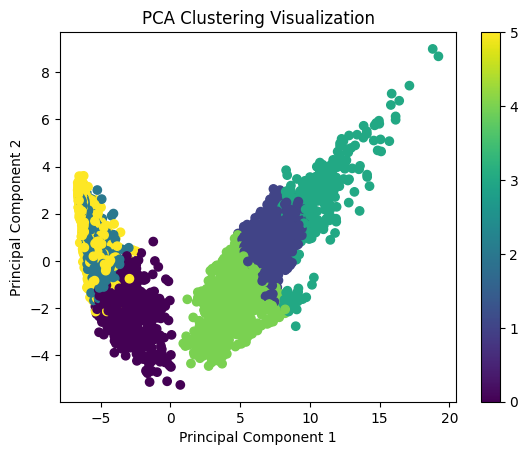

In [358]:
plt.scatter(X_pca_diaplay[:, 0], X_pca_diaplay[:, 1], c=labels_250_6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Clustering Visualization')
plt.colorbar()
plt.savefig('pca_kmeans_250_6.png')
plt.show()